In [18]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [19]:
file = open('test_results', 'rb')
test_results = pickle.load(file)
file.close()
test_results.keys()

dict_keys(['10 parameters', '20 parameters', '30 parameters', '40 parameters', '50 parameters', '60 parameters', '70 parameters', '80 parameters', '90 parameters', '100 parameters', '110 parameters', '120 parameters', '130 parameters', '140 parameters', '150 parameters', '160 parameters', '170 parameters', '180 parameters', '190 parameters', '200 parameters', '210 parameters', '220 parameters', '230 parameters', '240 parameters', '250 parameters', '260 parameters', '270 parameters', '280 parameters', '290 parameters'])

# time until convergence

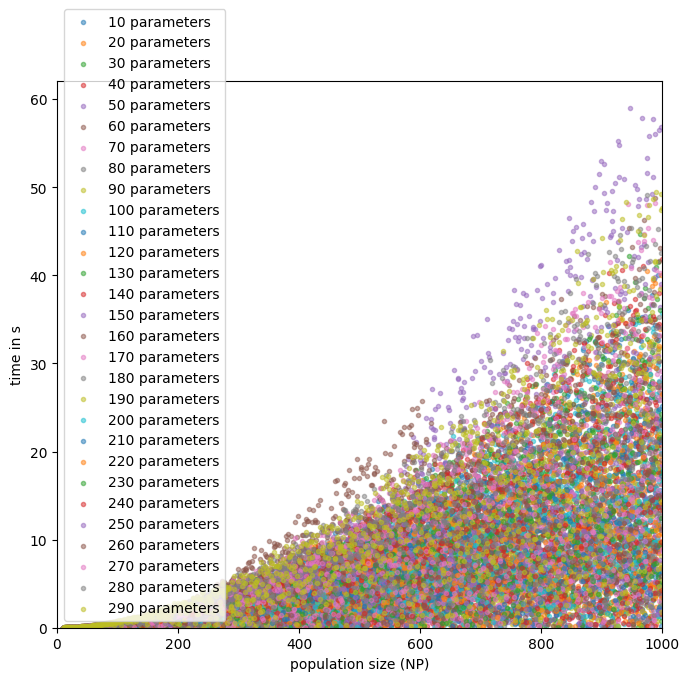

In [20]:
NP = range(10,1000)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

for key in test_results.keys():
    ax.scatter(NP, test_results[key]["times total"], marker='.', alpha=0.5, label=key)

ax.legend()
ax.set_xlabel("population size (NP)")
ax.set_ylabel("time in s")
ax.set_xlim(0,1000)
ax.set_ylim(0)
fig.tight_layout()
plt.show()

# time for one iteration

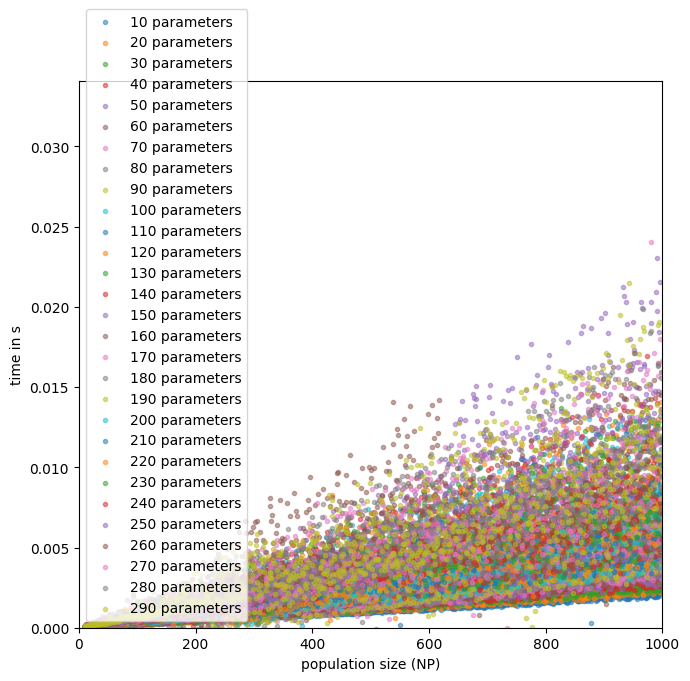

In [21]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

for key in test_results.keys():
    ax.scatter(NP, test_results[key]["times update"], marker='.', alpha=0.5, label=key)

ax.legend()
ax.set_xlabel("population size (NP)")
ax.set_ylabel("time in s")
ax.set_xlim(0,1000)
ax.set_ylim(0)
fig.tight_layout()
plt.show()

# number of iterations until convergence

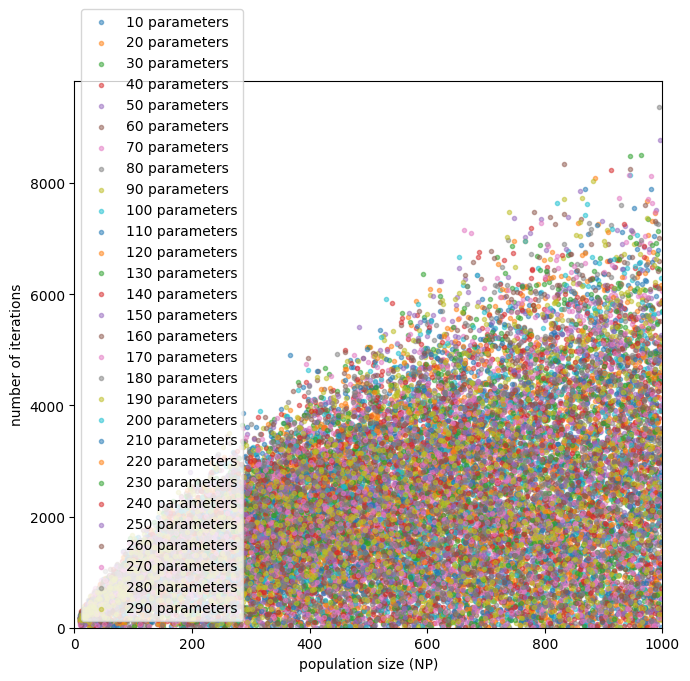

In [22]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

for key in test_results.keys():
    ax.scatter(NP, test_results[key]["iterations"], marker='.', alpha=0.5, label=key)

ax.legend()
ax.set_xlabel("population size (NP)")
ax.set_ylabel("number of iterations")
ax.set_xlim(0,1000)
ax.set_ylim(0)
fig.tight_layout()
plt.show()

# ToDo's:

- explore coverage of the parameter space
- observe different values for F and Cr
- create more objective functions

# base animation

In [23]:
from de import * 

In [36]:
NP=10
population = initialize_population(NP, ranges)
population_list = []
improvement = 0

print("population size:", len(population))

while len(population_list) <= MAX_ITER:
    population, improvement = update(population, mutate_rand_one, crossover_bin)
    population_list.append(population)

    if 0 < improvement < conv_threshold:
        break

print("number of generations: ", len(population_list))

population size: 10
number of generations:  125


In [39]:
for pop in population_list:
    print(pop == population_list[0])

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


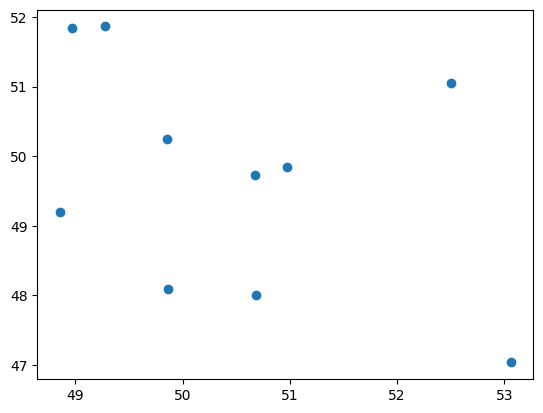

In [38]:
plt.scatter(np.array(population_list[-1]).T[0], np.array(population_list[-1]).T[1])

# polynomial funcion

In [26]:
def polynomial(x:float, y:float) -> float:
    return np.pow((x**2-1),2) + np.pow((y**2-1),2)


In [27]:
x = np.linspace(-2,2,1000)
y = np.linspace(-2,2,1000)
X,Y = np.meshgrid(x,y)
Z = polynomial(X,Y)

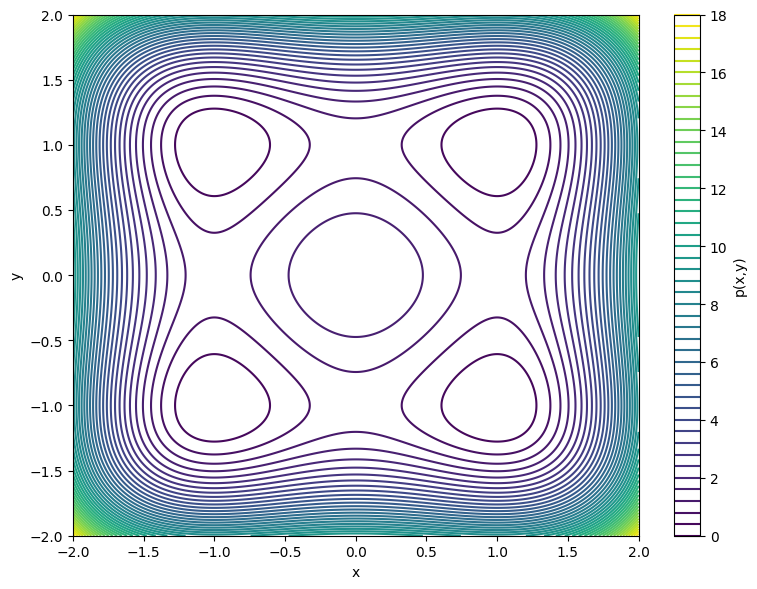

In [28]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

contour = ax.contour(X,Y,Z, levels=50)

ax.set_xlabel("x")
ax.set_ylabel("y")  

fig.colorbar(contour, label="p(x,y)")
fig.tight_layout()

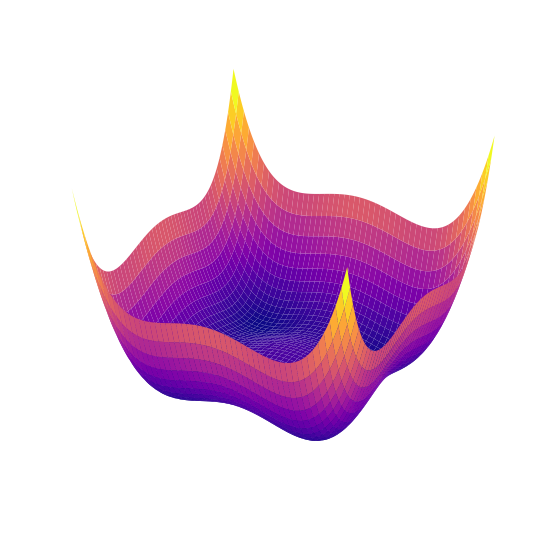

In [29]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X,Y,Z, cmap='plasma')

ax.set_axis_off()

# parabolic

In [30]:
def parabolic(x:float, y:float) -> float:
    return x**2 + y**2

In [31]:
Z = parabolic(X,Y)

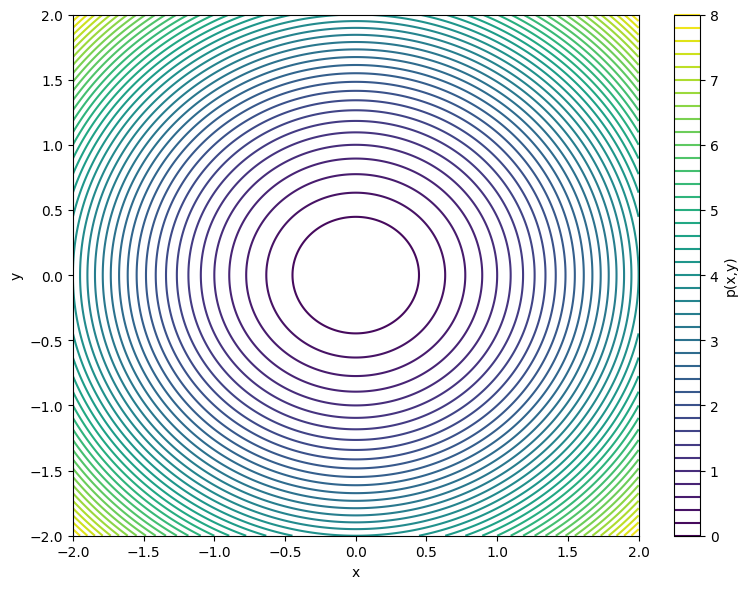

In [32]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

contour = ax.contour(X,Y,Z, levels=50)

ax.set_xlabel("x")
ax.set_ylabel("y")
fig.colorbar(contour, label="p(x,y)")
fig.tight_layout()

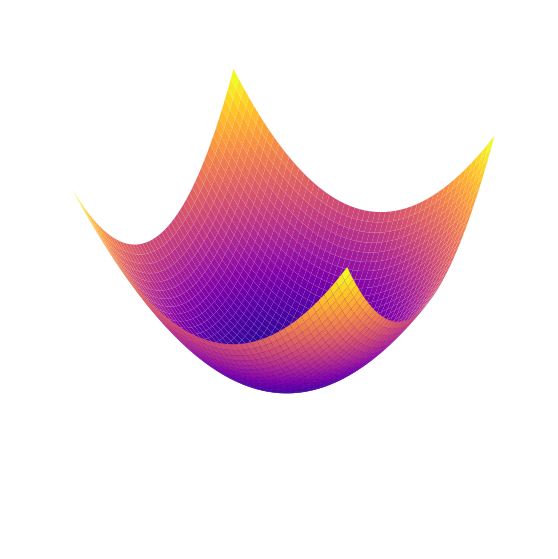

In [33]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X,Y,Z, cmap='plasma')

ax.set_axis_off()